Stock screeners are a great way to find the perfect stock for your particular trading strategy. However, when I try to search for the stock screener in Python, I can barely find any fully functional code. So I created this article to help others create an easy-to-read stock screener Python program based on Mark Minervini's Trend Pattern (8 best stock picking principles). Especially with the current market volatility, I hope this code helps you in your trading endeavors.

Before I get into the code, I want to touch on these principles.

The current price of the security must be greater than the 150 and 200 day simple moving averages.

The 150-day simple moving average must be greater than the 200-day simple moving average.

The 200-day simple moving average must be in an uptrend for at least 1 month.

The 50-day simple moving average must be greater than the 150-day moving average and the 200-day moving average.

The current price should be above the 50-day simple moving average.

The current price should be at least 30% above the 52-week low.

The current price should be within 25% of the 52-week high.

IBD RS-Rating must be greater than 70 (the higher, the better). The RS Rating is a measure of a stock's price performance over the past year relative to all other stocks and the market as a whole. Check out this article to learn more.

Now that you are familiar with the principles, we can get into the code. First, import the following dependencies. If you do not have one of the following modules installed on your machine, use “pip install (module name)” in your terminal to download them.

In [6]:
# Imports
import numpy as np
import pandas as pd
import datetime
import time

from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
import yfinance as yf
yf.pdr_override()

import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
from tqdm import tqdm
tf.compat.v1.random.set_random_seed(1234)

In [7]:
import pkg_resources
import types


def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split('.')[0]
        elif isinstance(val, type):
            name = val.__module__.split('.')[0]
        poorly_named_packages = {'PIL': 'Pillow', 'sklearn': 'scikit-learn'}
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
        yield name


imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != 'pip':
        requirements.append((m.project_name, m.version))

for r in requirements:
    print('{}=={}'.format(*r))

yfinance==0.1.59
tqdm==4.50.2
tensorflow==2.1.0
seaborn==0.11.0
scikit-learn==0.24.1
pandas==1.1.3
numpy==1.19.5
matplotlib==3.3.2


In [8]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

First, we have to import the dependencies we will use in the program like yahoo_fin (to get a list of codes) and pandas_datareader.data (to get historical stock data).

Next, we have to set the parameters for the rest of the program. As you can see, the stock list variable is set to codes in the S&P 500 using the “yahoo_fin” module. 

Index_name is set to the Yahoo Finance symbol for the S&P 500 so we can calculate the RS_Rating later. 

The last and the index are two empty lists that will help keep their place in the loop later in the event of failure due to too many requests to Yahoo Finance. 

Variable n equals -1 to keep the index of each code as you will see later. The “ExportList” is set using a pandas DataFrame of the metrics we will be tracking. Now we are ready to start sifting.

In [9]:
# Variables
tickers = si.tickers_sp500()
tickers = [item.replace(".", "-") for item in tickers] # Yahoo Finance uses dashes instead of dots
index_name = '^GSPC' # S&P 500
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])
returns_multiples = []

In [11]:
# Index Returns
index_df = pdr.get_data_yahoo(index_name, start_date, end_date)
index_df['Percent Change'] = index_df['Adj Close'].pct_change()
index_return = (index_df['Percent Change'] + 1).cumprod()[-1]


[*********************100%***********************]  1 of 1 completed


First, we have to import the dependencies we will use in the program like yahoo_fin (to get a list of codes) and pandas_datareader.data (to get historical stock data).

Next, we have to set the parameters for the rest of the program. As you can see, the stock list variable is set to codes in the S&P 500 using the “yahoo_fin” module. 

Index_name is set to the Yahoo Finance symbol for the S&P 500 so we can calculate the RS_Rating later. The last and the index are two empty lists that will help keep their place in the loop later in the event of failure due to too many requests to Yahoo Finance. Variable n equals -1 to keep the index of each code as you will see later. 

The “ExportList” is set using a pandas DataFrame of the metrics we will be tracking. Now we are ready to start sifting.


In [12]:
# Find top 10% performing stocks (relative to the S&P 500)
for ticker in tickers:
    # Download historical data as CSV for each stock (makes the process faster)
    df = pdr.get_data_yahoo(ticker, start_date, end_date)
    

    # Calculating returns relative to the market (returns multiple)
    df['Percent Change'] = df['Adj Close'].pct_change()
    stock_return = (df['Percent Change'] + 1).cumprod()[-1]
    
    returns_multiple = round((stock_return / index_return), 2)
    returns_multiples.extend([returns_multiple])
    
    print (f'Ticker: {ticker}; Returns Multiple against S&P 500: {returns_multiple}\n')
    time.sleep(0)

[*********************100%***********************]  1 of 1 completed
Ticker: A; Returns Multiple against S&P 500: 1.18

[*********************100%***********************]  1 of 1 completed
Ticker: AAL; Returns Multiple against S&P 500: 0.91

[*********************100%***********************]  1 of 1 completed
Ticker: AAP; Returns Multiple against S&P 500: 1.01

[*********************100%***********************]  1 of 1 completed
Ticker: AAPL; Returns Multiple against S&P 500: 1.16

[*********************100%***********************]  1 of 1 completed
Ticker: ABBV; Returns Multiple against S&P 500: 0.95

[*********************100%***********************]  1 of 1 completed
Ticker: ABC; Returns Multiple against S&P 500: 0.89

[*********************100%***********************]  1 of 1 completed
Ticker: ABMD; Returns Multiple against S&P 500: 0.87

[*********************100%***********************]  1 of 1 completed
Ticker: ABT; Returns Multiple against S&P 500: 0.92

[*********************1

[*********************100%***********************]  1 of 1 completed
Ticker: BLL; Returns Multiple against S&P 500: 0.86

[*********************100%***********************]  1 of 1 completed
Ticker: BMY; Returns Multiple against S&P 500: 0.83

[*********************100%***********************]  1 of 1 completed
Ticker: BR; Returns Multiple against S&P 500: 0.98

[*********************100%***********************]  1 of 1 completed
Ticker: BRK-B; Returns Multiple against S&P 500: 1.11

[*********************100%***********************]  1 of 1 completed
Ticker: BSX; Returns Multiple against S&P 500: 0.82

[*********************100%***********************]  1 of 1 completed
Ticker: BWA; Returns Multiple against S&P 500: 1.13

[*********************100%***********************]  1 of 1 completed
Ticker: BXP; Returns Multiple against S&P 500: 0.9

[*********************100%***********************]  1 of 1 completed
Ticker: C; Returns Multiple against S&P 500: 1.03

[*********************100%

[*********************100%***********************]  1 of 1 completed
Ticker: DISCA; Returns Multiple against S&P 500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: DISCK; Returns Multiple against S&P 500: 0.96

[*********************100%***********************]  1 of 1 completed
Ticker: DISH; Returns Multiple against S&P 500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: DLR; Returns Multiple against S&P 500: 0.87

[*********************100%***********************]  1 of 1 completed
Ticker: DLTR; Returns Multiple against S&P 500: 0.83

[*********************100%***********************]  1 of 1 completed
Ticker: DOV; Returns Multiple against S&P 500: 1.09

[*********************100%***********************]  1 of 1 completed
Ticker: DOW; Returns Multiple against S&P 500: 1.23

[*********************100%***********************]  1 of 1 completed
Ticker: DPZ; Returns Multiple against S&P 500: 0.88

[*****************

[*********************100%***********************]  1 of 1 completed
Ticker: GNRC; Returns Multiple against S&P 500: 2.2

[*********************100%***********************]  1 of 1 completed
Ticker: GOOG; Returns Multiple against S&P 500: 1.3

[*********************100%***********************]  1 of 1 completed
Ticker: GOOGL; Returns Multiple against S&P 500: 1.26

[*********************100%***********************]  1 of 1 completed
Ticker: GPC; Returns Multiple against S&P 500: 1.09

[*********************100%***********************]  1 of 1 completed
Ticker: GPN; Returns Multiple against S&P 500: 0.79

[*********************100%***********************]  1 of 1 completed
Ticker: GPS; Returns Multiple against S&P 500: 1.78

[*********************100%***********************]  1 of 1 completed
Ticker: GRMN; Returns Multiple against S&P 500: 1.13

[*********************100%***********************]  1 of 1 completed
Ticker: GS; Returns Multiple against S&P 500: 1.38

[*********************

[*********************100%***********************]  1 of 1 completed
Ticker: KSU; Returns Multiple against S&P 500: 1.44

[*********************100%***********************]  1 of 1 completed
Ticker: L; Returns Multiple against S&P 500: 1.12

[*********************100%***********************]  1 of 1 completed
Ticker: LB; Returns Multiple against S&P 500: 2.61

[*********************100%***********************]  1 of 1 completed
Ticker: LDOS; Returns Multiple against S&P 500: 0.76

[*********************100%***********************]  1 of 1 completed
Ticker: LEG; Returns Multiple against S&P 500: 1.13

[*********************100%***********************]  1 of 1 completed
Ticker: LEN; Returns Multiple against S&P 500: 1.19

[*********************100%***********************]  1 of 1 completed
Ticker: LH; Returns Multiple against S&P 500: 1.12

[*********************100%***********************]  1 of 1 completed
Ticker: LHX; Returns Multiple against S&P 500: 0.83

[*********************100%*

[*********************100%***********************]  1 of 1 completed
Ticker: NRG; Returns Multiple against S&P 500: 0.7

[*********************100%***********************]  1 of 1 completed
Ticker: NSC; Returns Multiple against S&P 500: 1.13

[*********************100%***********************]  1 of 1 completed
Ticker: NTAP; Returns Multiple against S&P 500: 1.3

[*********************100%***********************]  1 of 1 completed
Ticker: NTRS; Returns Multiple against S&P 500: 1.04

[*********************100%***********************]  1 of 1 completed
Ticker: NUE; Returns Multiple against S&P 500: 1.89

[*********************100%***********************]  1 of 1 completed
Ticker: NVDA; Returns Multiple against S&P 500: 1.53

[*********************100%***********************]  1 of 1 completed
Ticker: NVR; Returns Multiple against S&P 500: 1.04

[*********************100%***********************]  1 of 1 completed
Ticker: NWL; Returns Multiple against S&P 500: 1.29

[*********************1

[*********************100%***********************]  1 of 1 completed
Ticker: ROST; Returns Multiple against S&P 500: 0.89

[*********************100%***********************]  1 of 1 completed
Ticker: RSG; Returns Multiple against S&P 500: 0.95

[*********************100%***********************]  1 of 1 completed
Ticker: RTX; Returns Multiple against S&P 500: 0.94

[*********************100%***********************]  1 of 1 completed
Ticker: SBAC; Returns Multiple against S&P 500: 0.82

[*********************100%***********************]  1 of 1 completed
Ticker: SBUX; Returns Multiple against S&P 500: 1.04

[*********************100%***********************]  1 of 1 completed
Ticker: SCHW; Returns Multiple against S&P 500: 1.4

[*********************100%***********************]  1 of 1 completed
Ticker: SEE; Returns Multiple against S&P 500: 1.3

[*********************100%***********************]  1 of 1 completed
Ticker: SHW; Returns Multiple against S&P 500: 1.14

[*********************

[*********************100%***********************]  1 of 1 completed
Ticker: VMC; Returns Multiple against S&P 500: 1.12

[*********************100%***********************]  1 of 1 completed
Ticker: VNO; Returns Multiple against S&P 500: 0.85

[*********************100%***********************]  1 of 1 completed
Ticker: VRSK; Returns Multiple against S&P 500: 0.78

[*********************100%***********************]  1 of 1 completed
Ticker: VRSN; Returns Multiple against S&P 500: 0.78

[*********************100%***********************]  1 of 1 completed
Ticker: VRTX; Returns Multiple against S&P 500: 0.61

[*********************100%***********************]  1 of 1 completed
Ticker: VTR; Returns Multiple against S&P 500: 0.99

[*********************100%***********************]  1 of 1 completed
Ticker: VTRS; Returns Multiple against S&P 500: 0.63

[*********************100%***********************]  1 of 1 completed
Ticker: VZ; Returns Multiple against S&P 500: 0.79

[********************

In [13]:
# Creating dataframe of only top 2%
rs_df = pd.DataFrame(list(zip(tickers, returns_multiples)), columns=['Ticker', 'Returns_multiple'])
rs_df['RS_Rating'] = rs_df.Returns_multiple.rank(pct=True) * 100
rs_df = rs_df[rs_df.RS_Rating >= rs_df.RS_Rating.quantile(.995)]

In [14]:
rs_df

,Ticker,Returns_multiple,RS_Rating
179,FCX,2.84,100.00000
270,LB,2.61,99.80198
445,TSLA,2.41,99.60396


Note that time.sleep(1) will hold the code back 1 second per loop iteration just to slow down the number of requests to Yahoo Finance and limit potential errors. 

In the event the code stops in error, it will print its name and index on the list for every stock in the S&P 500 so you can easily start where you left off. For example, if the code stops at index 177 (Facebook stock) then you can swap the for loop with the code below and then start over.

In [15]:
stock_list = rs_df.iloc[:, 0].tolist()
stock_list

['FCX', 'LB', 'TSLA']

In [16]:
trading_stock = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = stock_list,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "2y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )



[*********************100%***********************]  3 of 3 completed


In [17]:
trading_stock 

TSLA                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2019-06-10   42.049999   43.388000   41.801998   42.576000  52925000   
2019-06-11   43.827999   44.180000   42.700001   43.419998  58267500   
2019-06-12   44.590000   44.675999   41.799999   41.852001  75987500   
2019-06-13   42.076000   42.980000   41.501999   42.782001  40841500   
2019-06-14   42.250000   43.330002   42.080002   42.984001  37167000   
...                ...         ...         ...         ...       ...   
2021-05-28  628.500000  635.590027  622.380005  625.219971  22737000   
2021-06-01  627.799988  633.799988  620.549988  623.900024  18084900   
2021-06-02  620.130005  623.359985  599.140015  605.119995  23302800   
2021-06-03  601.799988  604.549988  571.219971  572.840027  30111900   
2021-06-04  579.710022  600.609985  577.200012  599.049988  24002100   

                  FCX                                                    LB  \
                 Open       High        Low      Close    Volume       Open   
Date                                                                          
2019-06-10  10.273887  10.529750  10.264047  10.441182  19845300  21.751349   
2019-06-11  10.864341  10.962751  10.441183  10.451024  28608100  20.951039   
2019-06-12  10.391979  10.549433  10.283728  10.421501  12642800  21.132063   
2019-06-13  10.529752  10.726569  10.451025  10.657683  14470500  20.608046   
2019-06-14  10.578955  10.667523  10.431342  10.480546  14385700  21.189227   
...               ...        ...        ...        ...       ...        ...   
2021-05-28  42.570000  42.900002  42.060001  42.720001  14723100  69.347074   
2021-06-01  43.570000  44.400002  43.400002  44.209999  22142700  70.015601   
2021-06-02  44.000000  44.009998  42.959999  43.340000  14691300  70.065489   
2021-06-03  42.070000  42.200001  41.549999  41.869999  20223800  66.500000   
2021-06-04  42.209999  42.520000  41.320000  41.730000  15790600  66.410004   

                                                      
                 High        Low      Close   Volume  
Date                                                  
2019-06-10  21.760877  20.436551  20.789068  7350500  
2019-06-11  21.484581  20.912930  21.132063  5495400  
2019-06-12  21.217811  20.731906  20.808126  2759400  
2019-06-13  21.351194  20.503244  21.160643  3896600  
2019-06-14  21.579855  20.836709  21.446470  5476000  
...               ...        ...        ...      ...  
2021-05-28  70.484565  68.159690  69.716263  3629000  
2021-06-01  70.734018  69.067694  70.634239  4543200  
2021-06-02  70.334891  66.822640  68.019997  4747600  
2021-06-03  67.400002  65.500000  66.070000  5760300  
2021-06-04  66.620003  64.230003  65.709999  4321400  

[502 rows x 15 columns]

# Trading Algorithms

In [18]:
class Deep_Evolution_Strategy:

    inputs = None

    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-7)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

#For our Neural Network class:
        
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        return decision

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [19]:
class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(self, model, window_size, trend, skip, initial_money):
        self.model = model
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision = self.model.predict(np.array(sequence))
        return np.argmax(decision[0])
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        self.model.weights = weights
        state = self.get_state(0)
        inventory = []
        quantity = 0
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                starting_money -= close[t]
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                starting_money += self.trend[t]

            state = next_state
        return ((starting_money - initial_money) / initial_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        state = self.get_state(0)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest

In [20]:
#Initiating
window_size = 30
skip = 1
initial_money = 100000

In [21]:
#Stock 1, insert stock name manual to run the system
close = trading_stock["FCX"].Close.values.tolist()
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(model = model, 
              window_size = window_size,
              trend = close,
              skip = skip,
              initial_money = initial_money)
agent.fit(iterations = 100, checkpoint = 5)

iter 5. reward: 0.055336
iter 10. reward: 0.271056
iter 15. reward: 0.416954
iter 20. reward: 0.359818
iter 25. reward: 0.759678
iter 30. reward: 1.307686
iter 35. reward: 1.189031
iter 40. reward: 1.399159
iter 45. reward: 1.731480
iter 50. reward: 1.322777
iter 55. reward: 1.629308
iter 60. reward: 1.893332
iter 65. reward: 2.222992
iter 70. reward: 2.313637
iter 75. reward: 1.645105
iter 80. reward: 2.170167
iter 85. reward: 2.490824
iter 90. reward: 2.691746
iter 95. reward: 2.191275
iter 100. reward: 2.739122
time taken to train: 51.039371490478516 seconds


In [22]:
states_buy, states_sell, total_gains, invest = agent.buy()

day 0: buy 1 unit at price 20.789068, total balance 99979.210932
day 1: buy 1 unit at price 21.132063, total balance 99958.078869
day 2: buy 1 unit at price 20.808126, total balance 99937.270742
day 3: buy 1 unit at price 21.160643, total balance 99916.110100
day 4: buy 1 unit at price 21.446470, total balance 99894.663630
day 5: buy 1 unit at price 21.465527, total balance 99873.198103
day 6: buy 1 unit at price 21.779932, total balance 99851.418171
day 7: buy 1 unit at price 22.180090, total balance 99829.238081
day 8: buy 1 unit at price 22.789850, total balance 99806.448231
day 9, sell 1 unit at price 23.428196, investment 12.694786 %, total balance 99829.876427,
day 10: buy 1 unit at price 23.313866, total balance 99806.562561
day 11: buy 1 unit at price 22.827961, total balance 99783.734600
day 12, sell 1 unit at price 23.628273, investment 11.812430 %, total balance 99807.362873,
day 13, sell 1 unit at price 25.076460, investment 20.512820 %, total balance 99832.439333,
day 14, 

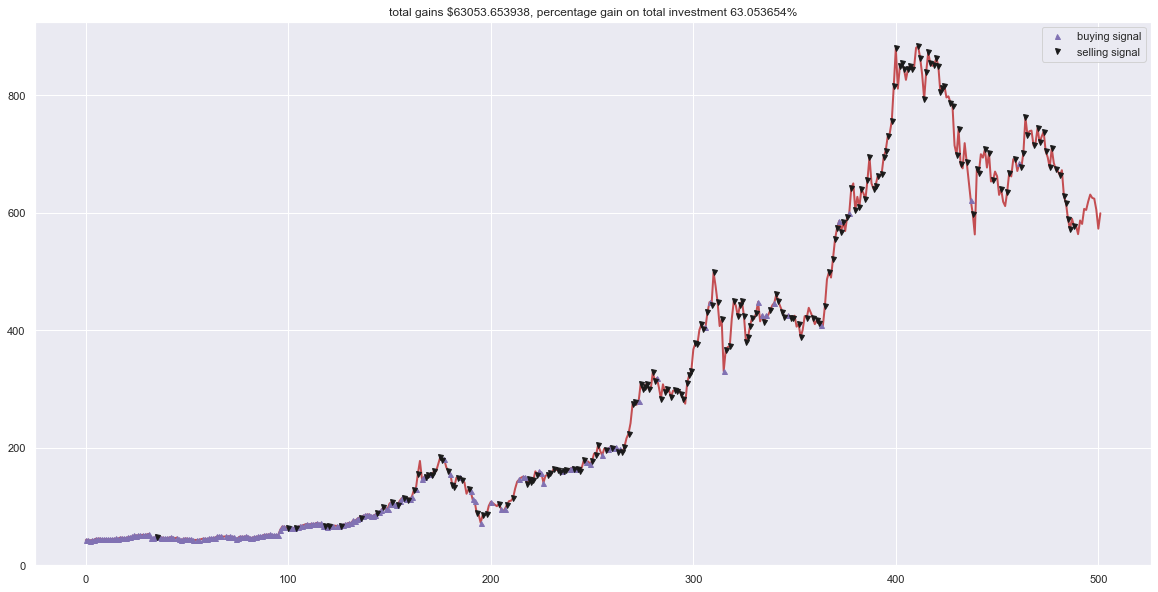

In [38]:
fig = plt.figure(figsize = (20,10))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=5, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=5, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains $%f, percentage gain on total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

Second Stock

In [39]:
close = trading_stock["LB"].Close.values.tolist()
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(model = model, 
              window_size = window_size,
              trend = close,
              skip = skip,
              initial_money = initial_money)
agent.fit(iterations = 100, checkpoint = 5)

iter 5. reward: -0.072104
iter 10. reward: 0.210756
iter 15. reward: 0.477953
iter 20. reward: 0.416693
iter 25. reward: 0.564094
iter 30. reward: 0.617145
iter 35. reward: 0.487086
iter 40. reward: 0.524329
iter 45. reward: 0.676301
iter 50. reward: 0.405568
iter 55. reward: 0.678481
iter 60. reward: 0.689547
iter 65. reward: 0.678251
iter 70. reward: 0.862472
iter 75. reward: 0.903350
iter 80. reward: 0.939890
iter 85. reward: 0.970186
iter 90. reward: 0.848392
iter 95. reward: 0.988362
iter 100. reward: 1.068816
time taken to train: 51.50510215759277 seconds


In [40]:
states_buy, states_sell, total_gains, invest = agent.buy()

day 0: buy 1 unit at price 20.789068, total balance 99979.210932
day 1: buy 1 unit at price 21.132063, total balance 99958.078869
day 2, sell 1 unit at price 20.808126, investment 0.091674 %, total balance 99978.886995,
day 3: buy 1 unit at price 21.160643, total balance 99957.726353
day 4: buy 1 unit at price 21.446470, total balance 99936.279882
day 5, sell 1 unit at price 21.465527, investment 1.577999 %, total balance 99957.745409,
day 6: buy 1 unit at price 21.779932, total balance 99935.965477
day 7: buy 1 unit at price 22.180090, total balance 99913.785387
day 8: buy 1 unit at price 22.789850, total balance 99890.995537
day 9: buy 1 unit at price 23.428196, total balance 99867.567341
day 10, sell 1 unit at price 23.313866, investment 10.175603 %, total balance 99890.881207,
day 12: buy 1 unit at price 23.628273, total balance 99867.252934
day 13: buy 1 unit at price 25.076460, total balance 99842.176474
day 14, sell 1 unit at price 24.866852, investment 15.948459 %, total balanc

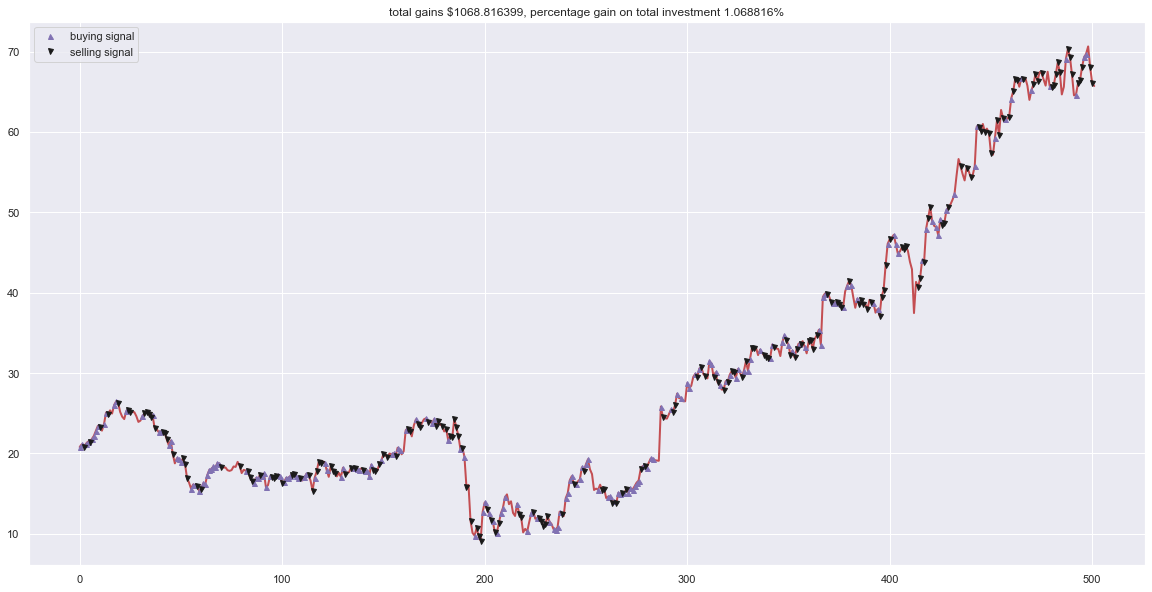

In [41]:
fig = plt.figure(figsize = (20,10))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=5, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=5, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains $%f, percentage gain on total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

Third Stock

In [42]:
close = trading_stock["TSLA"].Close.values.tolist()
window_size = 30
skip = 1
initial_money = 100000

model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(model = model, 
              window_size = window_size,
              trend = close,
              skip = skip,
              initial_money = initial_money)
agent.fit(iterations = 1000, checkpoint = 10)

iter 10. reward: 12.013480
iter 20. reward: 19.496092
iter 30. reward: 19.470818
iter 40. reward: 23.490696
iter 50. reward: 24.606892
iter 60. reward: 24.403290
iter 70. reward: 28.575970
iter 80. reward: 32.227834
iter 90. reward: 32.798534
iter 100. reward: 39.992604
iter 110. reward: 39.633498
iter 120. reward: 41.837086
iter 130. reward: 44.260336
iter 140. reward: 46.044872
iter 150. reward: 48.037362
iter 160. reward: 47.232754
iter 170. reward: 49.614070
iter 180. reward: 43.649970
iter 190. reward: 47.637092
iter 200. reward: 45.690754
iter 210. reward: 50.422276
iter 220. reward: 47.257344
iter 230. reward: 52.983882
iter 240. reward: 47.818602
iter 250. reward: 53.013644
iter 260. reward: 53.798380
iter 270. reward: 49.435788
iter 280. reward: 50.112936
iter 290. reward: 53.931842
iter 300. reward: 48.235246
iter 310. reward: 50.961030
iter 320. reward: 49.362304
iter 330. reward: 54.104868
iter 340. reward: 54.210702
iter 350. reward: 49.568626
iter 360. reward: 51.641982
i

In [43]:
states_buy, states_sell, total_gains, invest = agent.buy()

day 0: buy 1 unit at price 42.576000, total balance 99957.424000
day 1: buy 1 unit at price 43.419998, total balance 99914.004002
day 2: buy 1 unit at price 41.852001, total balance 99872.152000
day 3: buy 1 unit at price 42.782001, total balance 99829.369999
day 4: buy 1 unit at price 42.984001, total balance 99786.385998
day 5: buy 1 unit at price 45.006001, total balance 99741.379997
day 6: buy 1 unit at price 44.948002, total balance 99696.431995
day 7: buy 1 unit at price 45.285999, total balance 99651.145996
day 8: buy 1 unit at price 43.924000, total balance 99607.221996
day 9: buy 1 unit at price 44.372002, total balance 99562.849995
day 10: buy 1 unit at price 44.728001, total balance 99518.121994
day 11: buy 1 unit at price 43.952000, total balance 99474.169994
day 12: buy 1 unit at price 43.854000, total balance 99430.315994
day 13: buy 1 unit at price 44.568001, total balance 99385.747993
day 14: buy 1 unit at price 44.692001, total balance 99341.055992
day 15: buy 1 unit a

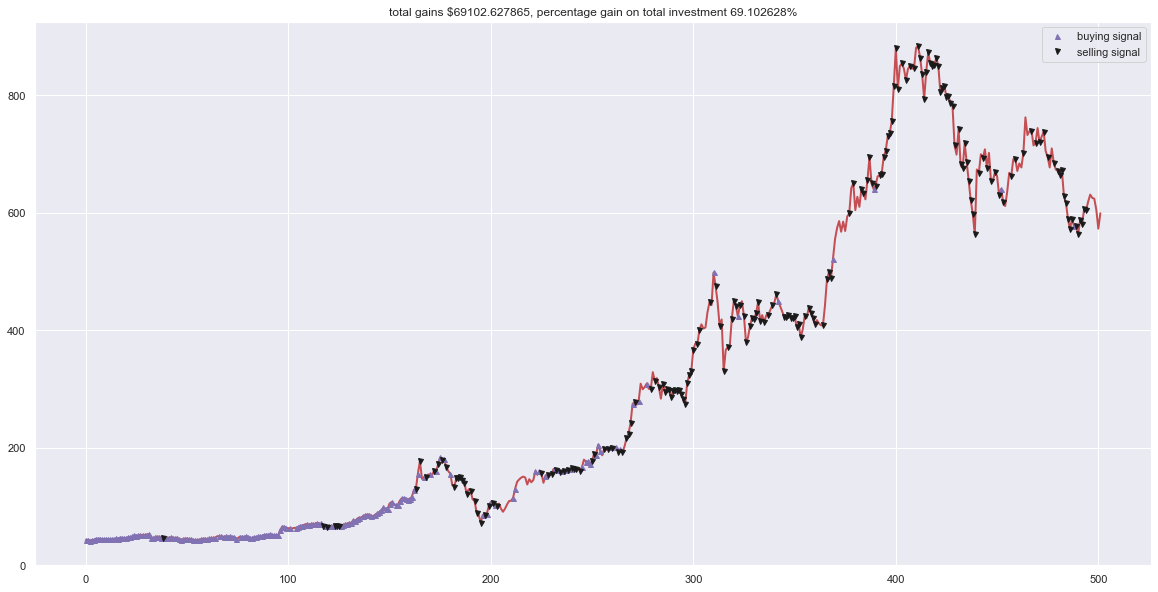

In [44]:
fig = plt.figure(figsize = (20,10))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=5, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=5, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains $%f, percentage gain on total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

# Backtesting Strategy